# TLX3 peaks in TLX3 cell line annotation

In [3]:
library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm9.knownGene)
txdb <- TxDb.Mmusculus.UCSC.mm9.knownGene

In [24]:
library(yaml)
rel_path = "/home/sergio/media"
tlx_list <- yaml.load_file("tracks/TLX3_TLX3_list.yaml")
tlx_peaks <- paste(rel_path, tlx_list$peaks[1], sep = "")

In [ ]:
peakAnno <- annotatePeak(tlx_peaks, tssRegion=c(-3000, 3000), 
                         TxDb=txdb, annoDb="org.Mm.eg.db")

## Visualize Genomic Annotation

The annotation column annotates the genomic location of a given peak. Since some annotations overlap, they are assigned based on the following priority.

- Promoter (defined by tssRegion parameter)
- 5’ UTR
- 3’ UTR
- Exon
- Intron
- Downstream (immediate downstream of a gene, within 3kb)
- Distal Intergenic

*Downstream* is defined as the downstream of gene end.

In package it have implemented *plotAnnoPie* and *plotAnnoBar* to visualize their distribution.

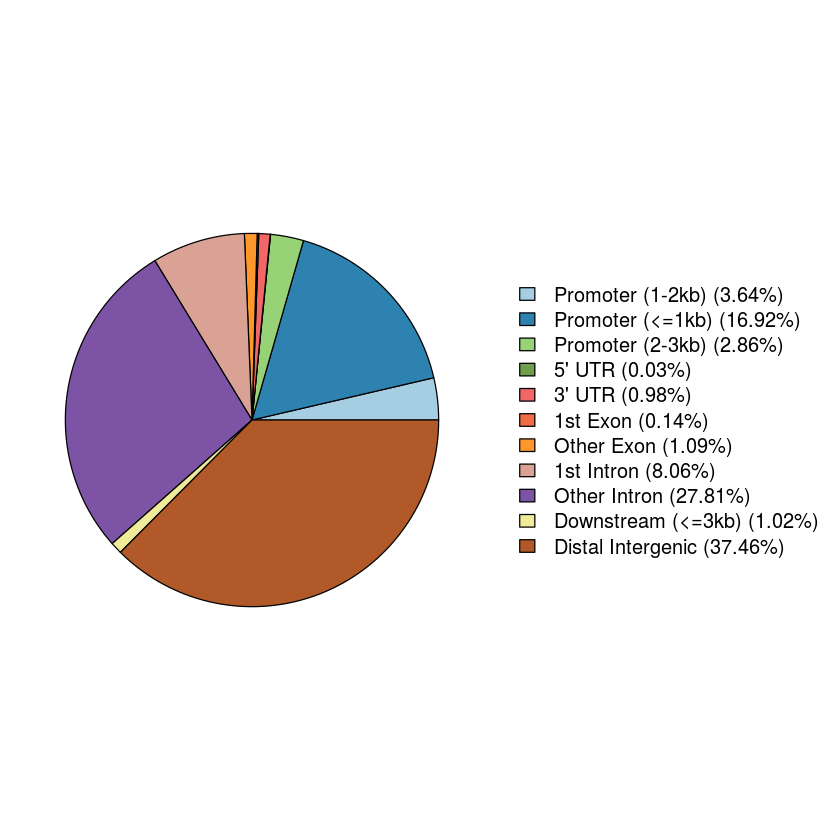

In [12]:
plotAnnoPie(peakAnno)

It is challenging to visualize the annotation overlap and *venn pie-agram* can partially solve this issue. It’s hard/impossible to visualize all the overlap information within one vennpie plot.

In package *ChIPseeker* it is employed the *vennpie* for that and now with the *vennpie* function, we can visualize some of the overlap annotations.

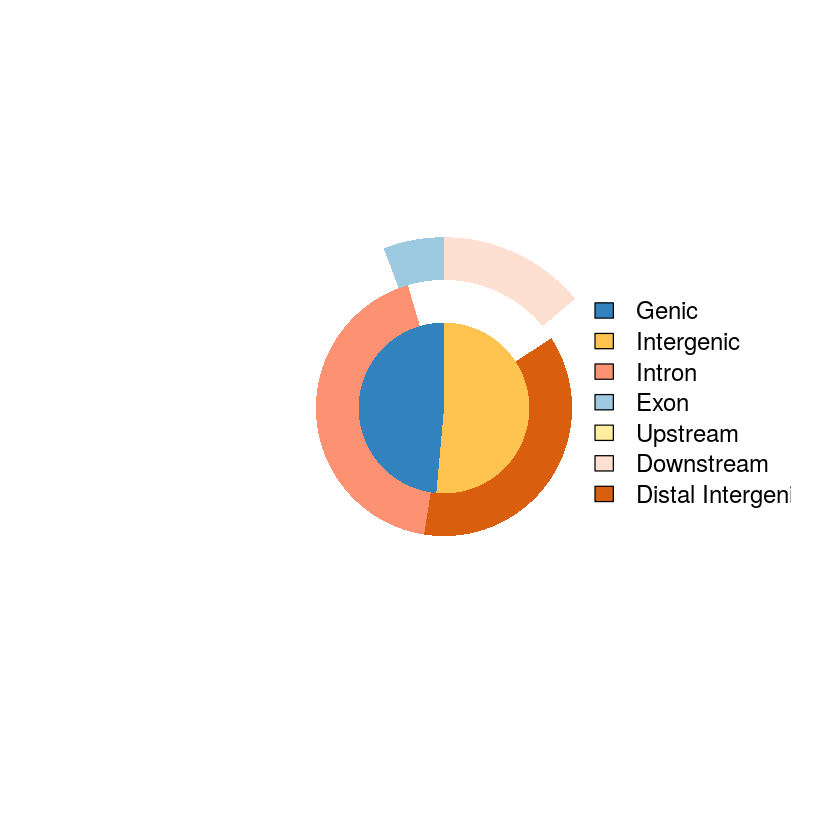

In [41]:
vennpie(peakAnno, r=0.15)

Not all overlap information can be demonstrated in *vennpie*. *Upset* is an effective way to visualize sets and intersections. We implement *upset*  upsetplot function, that can visualize ChIP annotation overlap directly. 

Although *upset* contains more information, *vennpie* is more intuitive and the final figure is more compact. 

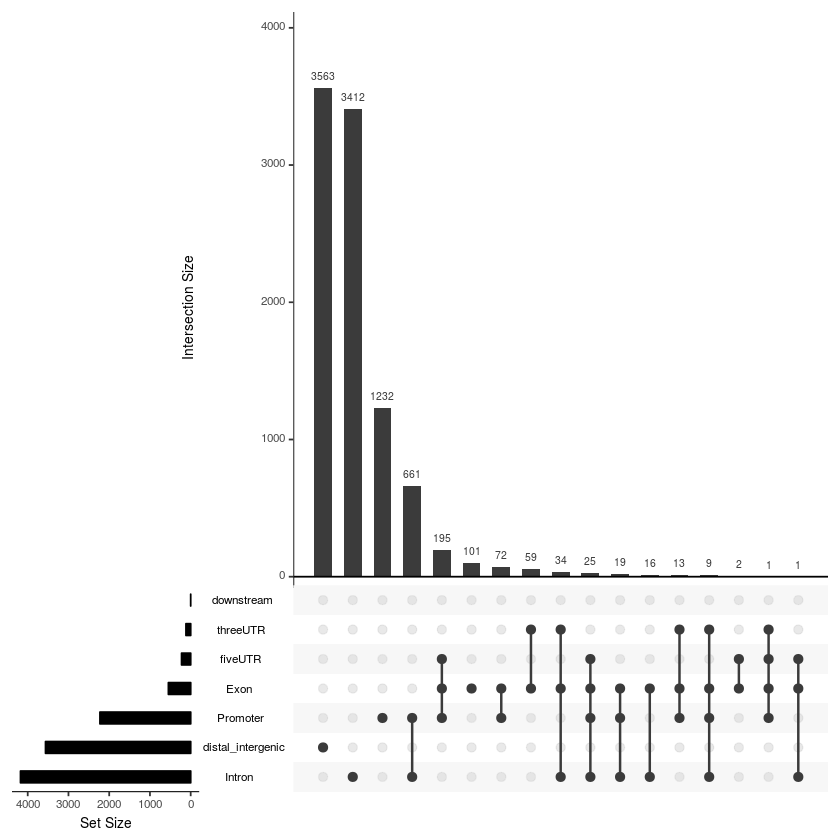

In [19]:
upsetplot(peakAnno)

## Visualize distribution of TF-binding loci relative to TSS

The distance from the peak (binding site) to the TSS of the nearest gene is calculated by *annotatePeak* and reported in the output.  We provide *plotDistToTSS* to calculate the percentage of binding sites upstream and downstream from the TSS of the nearest genes, and visualize the distribution.

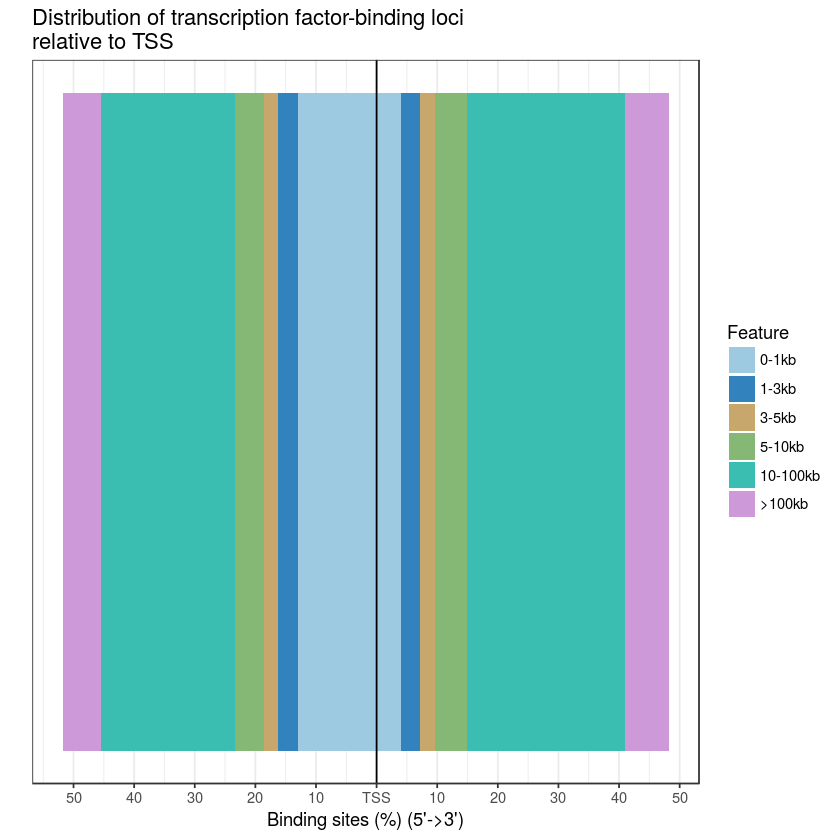

In [21]:

plotDistToTSS(peakAnno, 
              title="Distribution of transcription factor-binding loci\nrelative to TSS")

# Functional enrichment analysis in Reactome10



Once we have obtained the annotated nearest genes, we can perform functional enrichment analysis to identify predominant biological themes among these genes by incorporating biological knowledge provided by biological ontologies. For instance, Gene Ontology (GO)7 annotates genes to biological processes, molecular functions, and cellular components in a directed acyclic graph structure, Kyoto Encyclopedia of Genes and Genomes (KEGG)8 annotates genes to pathways, Disease Ontology (DO)9 annotates genes with human disease association, and Reactome10 annotates gene to pathways and reactions.

*ChIPseeker* also provides a function, **seq2gene**, for linking genomc regions to genes in a many-to-many mapping. It consider host gene (exon/intron), promoter region and flanking gene from intergenic region that may under control via cis-regulation. This function is designed to link both coding and non-coding genomic regions to coding genes and facilitate functional analysis.

Enrichment analysis is a widely used approach to identify biological themes. I have developed several Bioconductor packages for investigating whether the number of selected genes associated with a particular biological term is larger than expected, including DOSE2 for Disease Ontology, ReactomePA for reactome pathway, clusterProfiler4 for Gene Ontology and KEGG enrichment analysis.


**Reactome** is an open-source, open access, manually curated and peer-reviewed pathway database. [Reactome](http://www.reactome.org/)


Enrichment analysis is a widely used approach to identify biological themes. Here, we implement hypergeometric model to assess whether the number of selected genes associated with reactome pathway is larger than expected. The p values were calculated based the hypergeometric model2

In [38]:
library(ReactomePA)
peak <- readPeakFile(tlx_peaks)

In [39]:
gene <- seq2gene(peak, tssRegion = c(-1000, 1000), flankDistance = 3000, TxDb=txdb)
pathway <- enrichPathway(gene, organism = "mouse") 

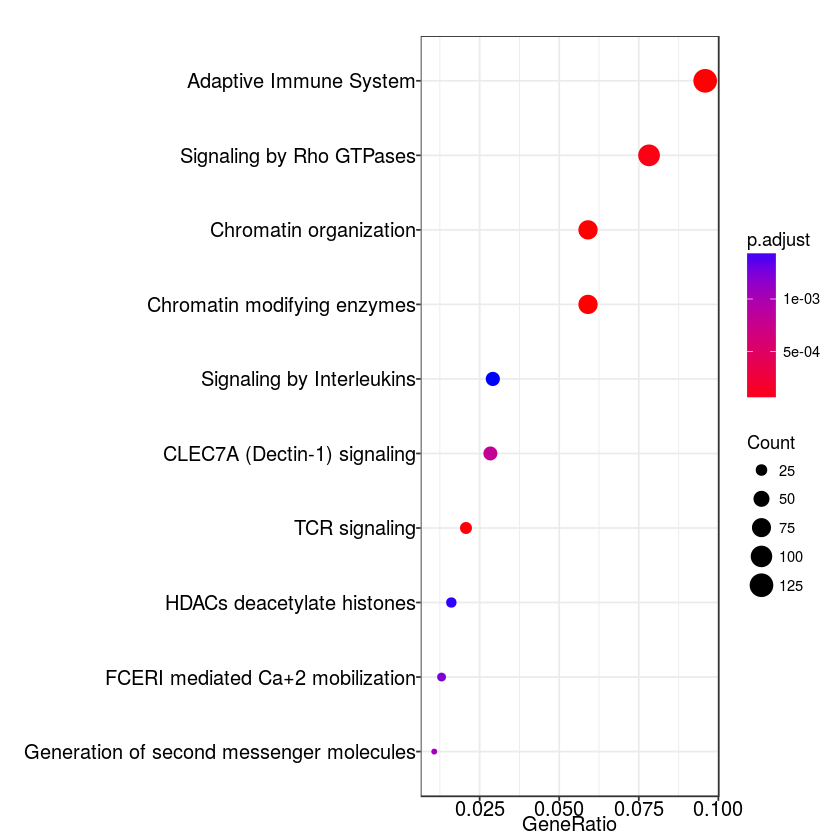

In [40]:
dotplot(pathway)